In [1]:
#import Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
#import dataset 
df=pd.read_csv("C:/Users/SAI SAATHWIK DUSSA/Downloads/time_series_revenue.csv")

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   Month                                                   105 non-null    object
 1   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [5]:
df['Month']=pd.to_datetime(df.Month)

In [6]:
df.rename (columns={'Month':'date','Perrin Freres monthly champagne sales millions ?64-?72':'sales'},inplace=True)

In [7]:
df=df.set_index('date')

In [8]:
df

,sales
date,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946
...,...
1972-05-01,4618
1972-06-01,5312
1972-07-01,4298


<AxesSubplot:xlabel='date'>

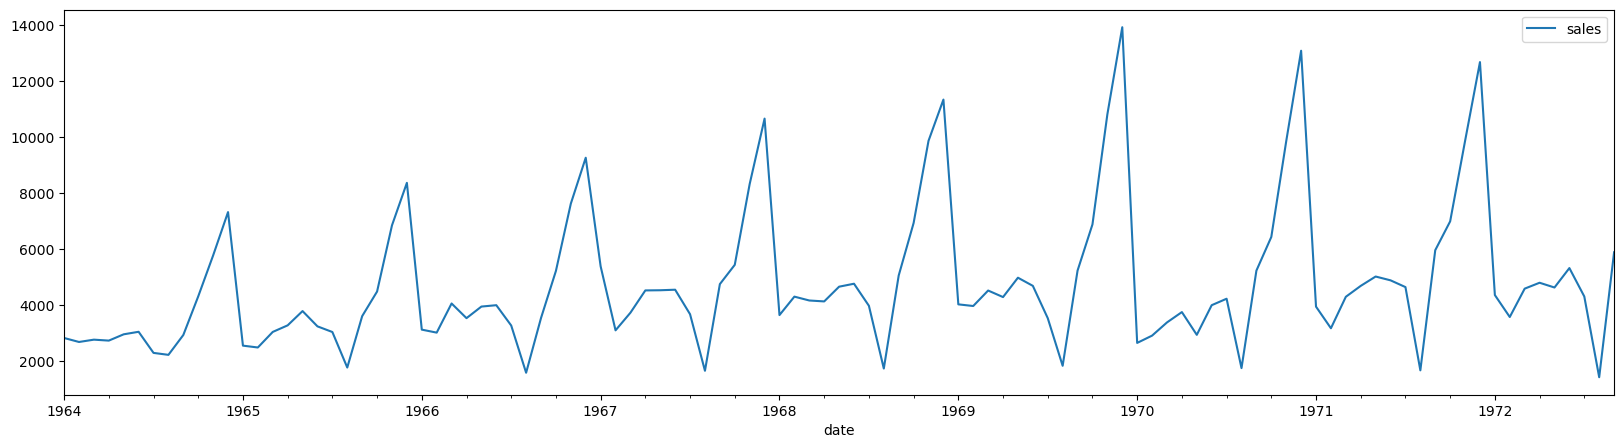

In [9]:
df.plot(figsize=(20,5))

# Here it is clear that there is seasonality

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose 

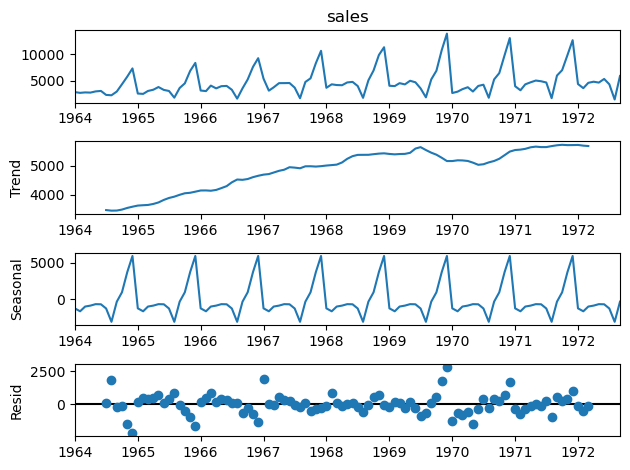

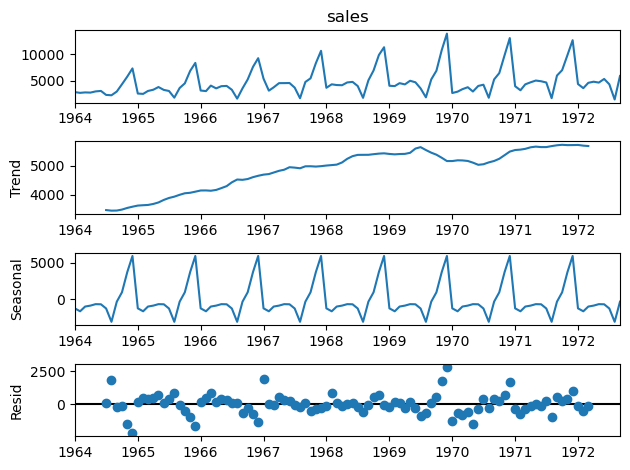

In [11]:
seasonal_decompose(df['sales']).plot()

# from the above decomposition we can say that there is an upward trend and also seasonality

# Stationary test

In [12]:
from statsmodels.tsa.stattools import adfuller
def adf_test (series):
    result=adfuller(series)
    print ('p-value:{}'.format(result[1]))
    if result[1]<=0.05:
        print("Stationary")
    else:
        print("Not stationary")
adf_test(df['sales'])

p-value:0.363915771660244
Not stationary


# Seasonal first difference

In [13]:
df['sales']-df['sales'].shift(12)

date
1964-01-01      NaN
1964-02-01      NaN
1964-03-01      NaN
1964-04-01      NaN
1964-05-01      NaN
              ...  
1972-05-01   -392.0
1972-06-01    438.0
1972-07-01   -335.0
1972-08-01   -246.0
1972-09-01    -74.0
Name: sales, Length: 105, dtype: float64

In [14]:
df['seasonal first diff']=df['sales']-df['sales'].shift(12)

In [15]:
df.head(15)

,sales,seasonal first diff
date,,
1964-01-01,2815,NaN
1964-02-01,2672,NaN
1964-03-01,2755,NaN
1964-04-01,2721,NaN
1964-05-01,2946,NaN
1964-06-01,3036,NaN
1964-07-01,2282,NaN
1964-08-01,2212,NaN
1964-09-01,2922,NaN


# stationarity test

In [16]:
adf_test(df['seasonal first diff'].dropna())

p-value:2.060579696813685e-11
Stationary


# I=1

<AxesSubplot:xlabel='date'>

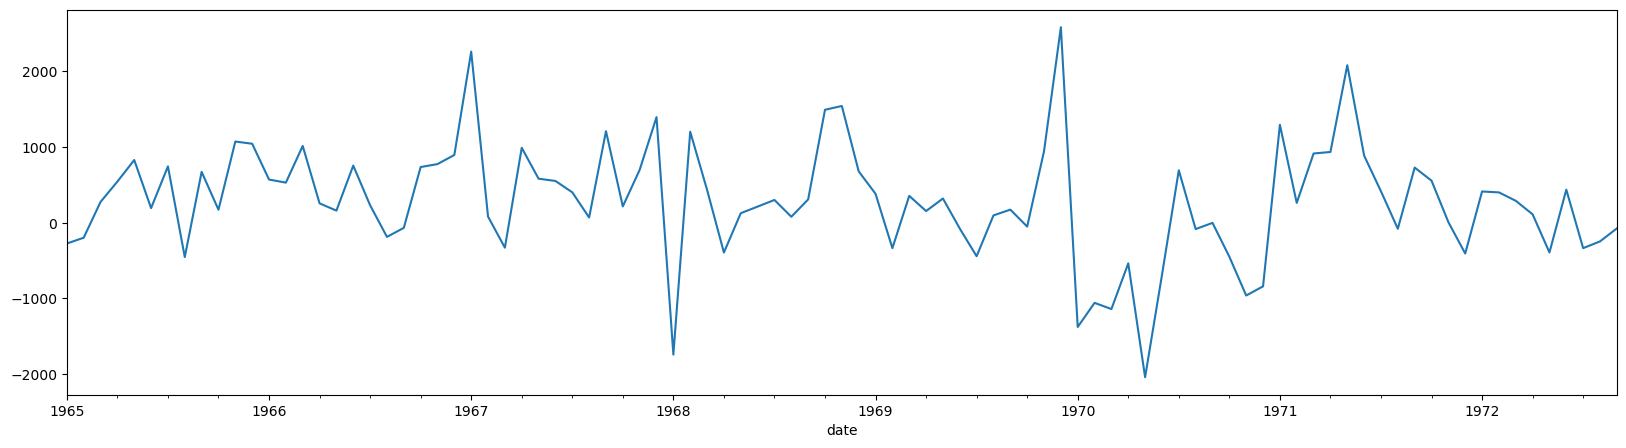

In [17]:
df['seasonal first diff'].dropna().plot(figsize=(20,5))

C:\Users\SAI SAATHWIK DUSSA\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


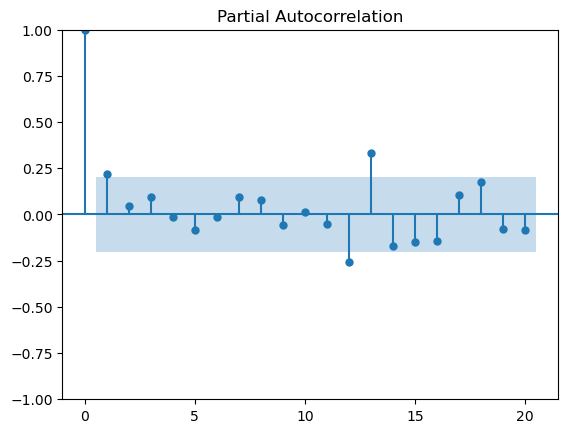

In [18]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
pacf=plot_pacf(df['seasonal first diff'].dropna())

# p=1,12,13

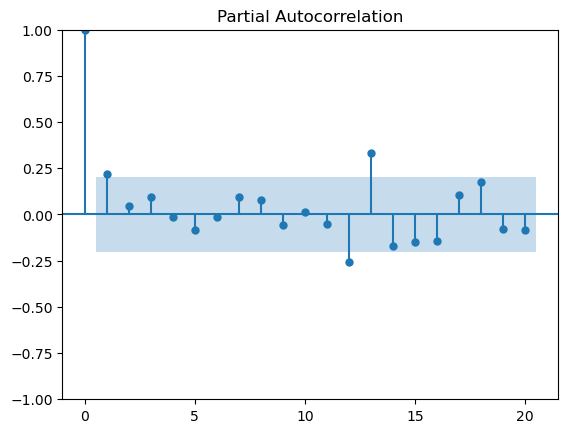

In [19]:
acf=plot_pacf(df['seasonal first diff'].dropna())

# q=1,12,13

# SARIMA

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(df['sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\SAI SAATHWIK DUSSA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SAI SAATHWIK DUSSA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [21]:
results.predict()

1964-01-01       0.000000
1964-02-01    2527.715330
1964-03-01    2567.875820
1964-04-01    2693.809973
1964-05-01    2699.235641
                 ...     
1972-05-01    4751.311802
1972-06-01    4881.451309
1972-07-01    4977.891377
1972-08-01    1761.633864
1972-09-01    5878.711681
Freq: MS, Name: predicted_mean, Length: 105, dtype: float64

In [22]:
df.head()

,sales,seasonal first diff
date,,
1964-01-01,2815,NaN
1964-02-01,2672,NaN
1964-03-01,2755,NaN
1964-04-01,2721,NaN
1964-05-01,2946,NaN


In [23]:
df['forecast']=results.predict()



In [24]:
df.head()

,sales,seasonal first diff,forecast
date,,,
1964-01-01,2815,NaN,0.000000
1964-02-01,2672,NaN,2527.715330
1964-03-01,2755,NaN,2567.875820
1964-04-01,2721,NaN,2693.809973
1964-05-01,2946,NaN,2699.235641


In [25]:
#plot

<AxesSubplot:xlabel='date'>

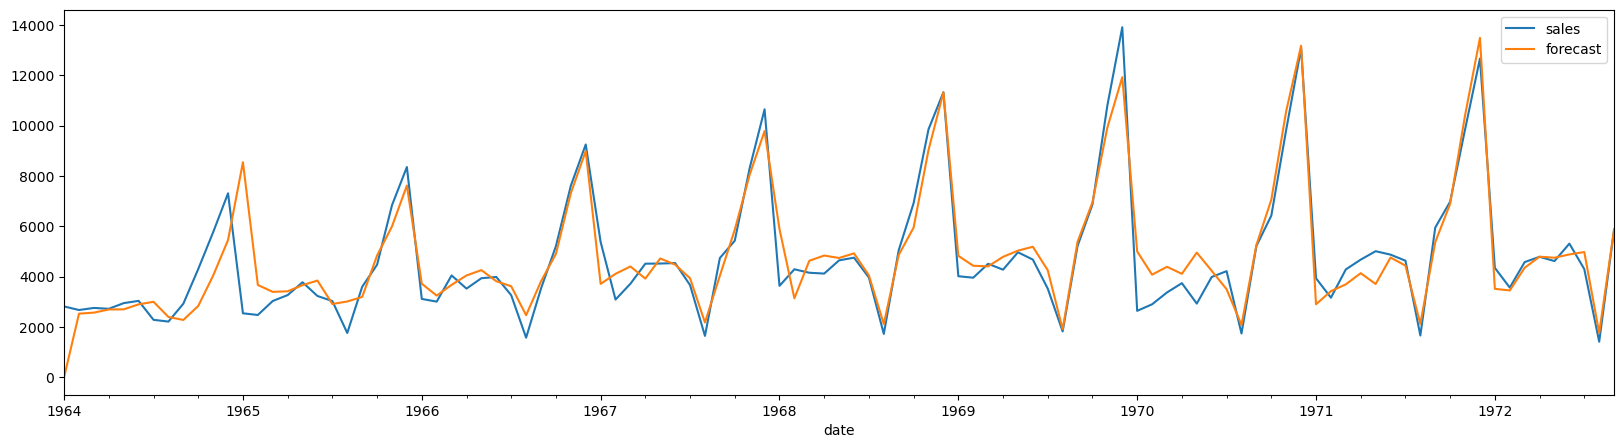

In [26]:
df[['sales','forecast']].plot(figsize=(20,5))

# Predicting future sales

In [27]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+DateOffset(months=x)for x in range(0,25)]

In [28]:
df=df.append(pd.DataFrame(index=future_dates,columns=df.columns))

C:\Users\SAI SAATHWIK DUSSA\AppData\Local\Temp\ipykernel_26576\2863014490.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(pd.DataFrame(index=future_dates,columns=df.columns))


In [29]:
df

,sales,seasonal first diff,forecast
1964-01-01,2815,NaN,0.000000
1964-02-01,2672,NaN,2527.715330
1964-03-01,2755,NaN,2567.875820
1964-04-01,2721,NaN,2693.809973
1964-05-01,2946,NaN,2699.235641
...,...,...,...
1974-05-01,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN


In [30]:
df['forecast']=results.predict(start='1972-09-01',end='1974-09-01')

In [31]:
df.tail()

,sales,seasonal first diff,forecast
1974-05-01,NaN,NaN,5119.279906
1974-06-01,NaN,NaN,5675.026832
1974-07-01,NaN,NaN,4725.987349
1974-08-01,NaN,NaN,1823.260201
1974-09-01,NaN,NaN,6289.842087


# visualization

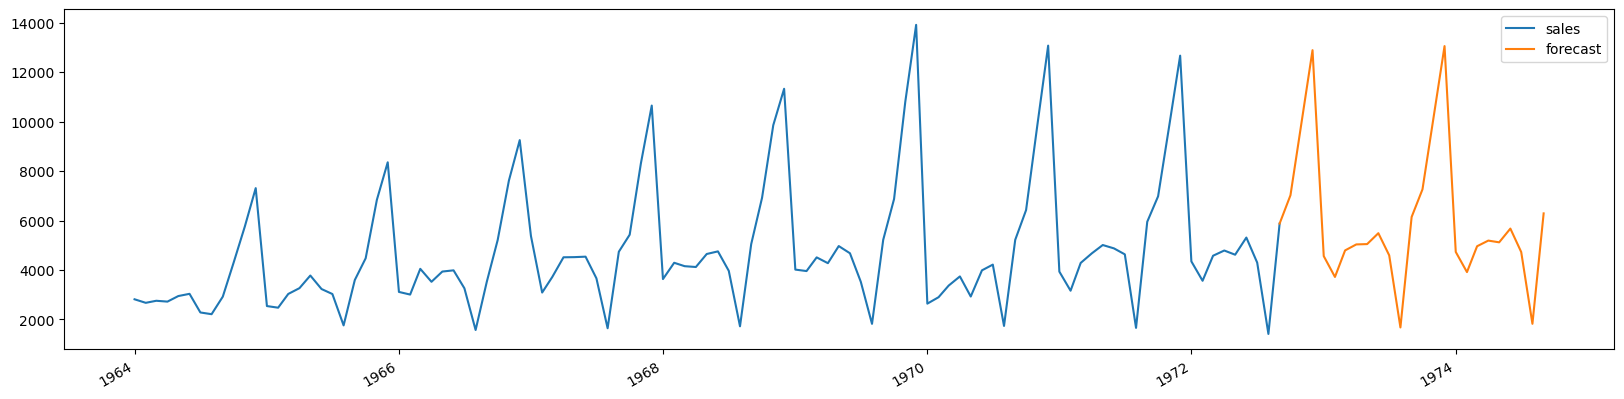

In [32]:
df[['sales','forecast']].plot(figsize=(20,5))
plt.show()